# Predicting Dollars Wagered on a Sportsball Game - Jackson Porter
#### Objective: Predicting the number of dollars wagered on matches in week 12 of the 2020 season.

#### Data Sources:

1. events.csv - Contains data about the sportsball events.
2. users.csv - Contains demographic data of users who placed wagers.
3. wagers.csv - Contains data on individual wagers placed on the sportsball games.

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Part 1: Loading and Exploratory Data Analysis

### a. Load Data

In [20]:
# Load csv data
events = pd.read_csv('../data/events.csv')
users = pd.read_csv('../data/users.csv')
wagers = pd.read_csv('../data/wagers.csv')

# Formatting
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

# Display DFs
print(color.BOLD + "Events DataFrame:" + color.END)
display(events.head())

print(color.BOLD + "\nUsers DataFrame:" + color.END)
display(users.head())

print(color.BOLD + "\nWagers DataFrame:" + color.END)
display(wagers.head())

Events DataFrame:


,event_id,home_team,away_team,home_team_location,away_team_location,game_start_time,day_of_week,time_slot,game_day,week_start,week_of_season
0,21598,Lucky Leopards,Hungry Harpys,Regensland,Regensland,2019-03-18 13:00:00.000,Monday,mon_early,2019-03-18 00:00:00.000,2019-03-12 00:00:00.000,8.0
1,21862,Pirate Poodles,Hopeful Hens,Flat Island,Springfield,2019-05-20 13:00:00.000,Monday,mon_early,2019-05-20 00:00:00.000,2019-05-14 00:00:00.000,17.0
2,50898,Lucky Leopards,Ramblin Rabbits,Regensland,Alterburg,2018-03-12 13:00:00.000,Monday,mon_early,2018-03-12 00:00:00.000,2018-03-06 00:00:00.000,7.0
3,36665,Bellicose Bluejays,Wonder Whales,Vistatown,Rose Station,2018-04-09 16:05:00.000,Monday,mon_mid,2018-04-09 00:00:00.000,2018-04-03 00:00:00.000,11.0
4,50982,Cyclic Cobras,Devious Dandys,Soot Mountain,Hillsville,2018-05-07 13:00:00.000,Monday,mon_early,2018-05-07 00:00:00.000,2018-05-01 00:00:00.000,15.0



Users DataFrame:


,user_number,age,registration_timestamp,location
0,user_0042a,43.0,2019-03-18 17:50:06,Boroughsville
1,user_0071f,23.0,2018-04-10 15:25:51,Regensland
2,user_00cbe,49.0,2020-03-09 16:24:40,Regensland
3,user_0110b,22.0,2019-03-19 14:49:28,Regensland
4,user_015ea,27.0,2019-05-09 02:44:20,Boroughsville



Wagers DataFrame:


,bet_id,user_number,event_id,bet_offer_type,wager_amount,outcome_decimal_odds,outcome_american_odds,bet_placed_time,bet_status,bet_result,payout
0,1,user_cccd8,50902,Spread,8.5,1.91,-110.0,2018-03-07 20:29:24.000,settled,lost,0.0
1,2,user_d7501,50905,Spread,42.5,1.91,-110.0,2018-03-07 23:05:03.000,settled,lost,0.0
2,3,user_d7501,50906,Over/Under,12.8,1.91,-110.0,2018-03-07 23:05:39.000,settled,lost,0.0
3,4,user_16fc0,50902,Spread,4.3,1.91,-110.0,2018-03-08 18:42:18.000,settled,lost,0.0
4,5,user_70a4f,50902,Spread,425.0,1.91,-110.0,2018-03-08 20:41:20.000,settled,lost,0.0


### b. Missing Value Handling

In [21]:
# Check for missing values
print(events.isnull().sum())
print('\n')
print(users.isnull().sum())
print('\n')
print(wagers.isnull().sum())

event_id              0
home_team             0
away_team             0
home_team_location    0
away_team_location    0
game_start_time       0
day_of_week           0
time_slot             0
game_day              0
week_start            0
week_of_season        0
dtype: int64


user_number                 0
age                       676
registration_timestamp      0
location                    0
dtype: int64


bet_id                   0
user_number              0
event_id                 0
bet_offer_type           0
wager_amount             0
outcome_decimal_odds     0
outcome_american_odds    0
bet_placed_time          0
bet_status               0
bet_result               0
payout                   0
dtype: int64


In [22]:
# Handle missing age values
users['age'].fillna(users['age'].median(), inplace=True)

With more time, I would consider filling these missing values using ML or statistical methods to improve accuracy. For example, predicting the missing values based on other features using k-Nearest Neighbours or using a statistical technique such as multiple imputation.

### c. Types of Features and Descriptive Statistics

In [23]:
# Summary statistics
print(color.BOLD + '\nEvents:' + color.END)
display(events.describe().transpose())
print('\n')
display(events.info())
print(color.BOLD + '\nUsers:' + color.END)
display(users.describe().transpose())
print('\n')
display(users.info())
print(color.BOLD + '\nWagers:' + color.END)
display(wagers.describe().transpose())
print('\n')
display(wagers.info())


Events:


,count,mean,std,min,25%,50%,75%,max
event_id,245.0,39344.448980,20113.288120,16273.0,21813.0,33708.0,51045.0,98584.0
week_of_season,245.0,13.910204,5.979481,1.0,9.0,13.0,19.0,26.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            245 non-null    int64  
 1   home_team           245 non-null    object 
 2   away_team           245 non-null    object 
 3   home_team_location  245 non-null    object 
 4   away_team_location  245 non-null    object 
 5   game_start_time     245 non-null    object 
 6   day_of_week         245 non-null    object 
 7   time_slot           245 non-null    object 
 8   game_day            245 non-null    object 
 9   week_start          245 non-null    object 
 10  week_of_season      245 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 21.2+ KB


None


Users:


,count,mean,std,min,25%,50%,75%,max
age,80000.0,33.013337,9.324241,21.0,26.0,31.0,37.0,89.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_number             80000 non-null  object 
 1   age                     80000 non-null  float64
 2   registration_timestamp  80000 non-null  object 
 3   location                80000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.4+ MB


None


Wagers:


,count,mean,std,min,25%,50%,75%,max
bet_id,554019.0,277010.000000,159931.653731,1.00,138505.50,277010.00,415514.50,554019.0
event_id,554019.0,36818.971566,19895.582706,16273.00,21729.00,21923.00,54769.00,98584.0
wager_amount,554019.0,77.469245,1209.772194,0.00,6.80,17.00,42.50,338300.0
outcome_decimal_odds,554019.0,2.446753,2.421521,1.01,1.87,1.91,2.02,201.0
outcome_american_odds,554019.0,-11.943906,307.719400,-10000.00,-115.00,-110.00,102.00,20000.0
payout,554019.0,77.447360,1883.539843,0.00,0.00,0.00,32.50,646153.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554019 entries, 0 to 554018
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   bet_id                 554019 non-null  int64  
 1   user_number            554019 non-null  object 
 2   event_id               554019 non-null  int64  
 3   bet_offer_type         554019 non-null  object 
 4   wager_amount           554019 non-null  float64
 5   outcome_decimal_odds   554019 non-null  float64
 6   outcome_american_odds  554019 non-null  float64
 7   bet_placed_time        554019 non-null  object 
 8   bet_status             554019 non-null  object 
 9   bet_result             554019 non-null  object 
 10  payout                 554019 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 46.5+ MB


None

### d. Merge Data

In [24]:
# Merge events and wagers on 'event_id'
events_wagers = pd.merge(events, wagers, on='event_id')

# Merge the resulting DataFrame with users on 'user_number'
full_data = pd.merge(events_wagers, users, on='user_number')

full_data.head()

,event_id,home_team,away_team,home_team_location,away_team_location,game_start_time,day_of_week,time_slot,game_day,week_start,week_of_season,bet_id,user_number,bet_offer_type,wager_amount,outcome_decimal_odds,outcome_american_odds,bet_placed_time,bet_status,bet_result,payout,age,registration_timestamp,location
0,21598,Lucky Leopards,Hungry Harpys,Regensland,Regensland,2019-03-18 13:00:00.000,Monday,mon_early,2019-03-18 00:00:00.000,2019-03-12 00:00:00.000,8.0,164667,user_c6d50,Spread,21.3,1.95,-106.0,2019-03-11 20:02:03.823,settled,lost,0.0,26.0,2018-03-07 14:15:16,Regensland
1,21598,Lucky Leopards,Hungry Harpys,Regensland,Regensland,2019-03-18 13:00:00.000,Monday,mon_early,2019-03-18 00:00:00.000,2019-03-12 00:00:00.000,8.0,174536,user_c6d50,Over/Under,21.3,1.88,-114.0,2019-03-18 12:06:55.670,settled,won,40.2,26.0,2018-03-07 14:15:16,Regensland
2,21862,Pirate Poodles,Hopeful Hens,Flat Island,Springfield,2019-05-20 13:00:00.000,Monday,mon_early,2019-05-20 00:00:00.000,2019-05-14 00:00:00.000,17.0,309526,user_c6d50,Spread,21.3,1.95,-106.0,2019-05-13 22:00:58.543,settled,lost,0.0,26.0,2018-03-07 14:15:16,Regensland
3,21862,Pirate Poodles,Hopeful Hens,Flat Island,Springfield,2019-05-20 13:00:00.000,Monday,mon_early,2019-05-20 00:00:00.000,2019-05-14 00:00:00.000,17.0,313220,user_c6d50,Over/Under,21.3,1.92,-109.0,2019-05-20 11:09:37.734,settled,lost,0.0,26.0,2018-03-07 14:15:16,Regensland
4,50898,Lucky Leopards,Ramblin Rabbits,Regensland,Alterburg,2018-03-12 13:00:00.000,Monday,mon_early,2018-03-12 00:00:00.000,2018-03-06 00:00:00.000,7.0,2129,user_c6d50,Spread,17.0,1.90,-112.0,2018-03-12 17:34:27.000,settled,won,32.3,26.0,2018-03-07 14:15:16,Regensland


### e. Visualizing the Data

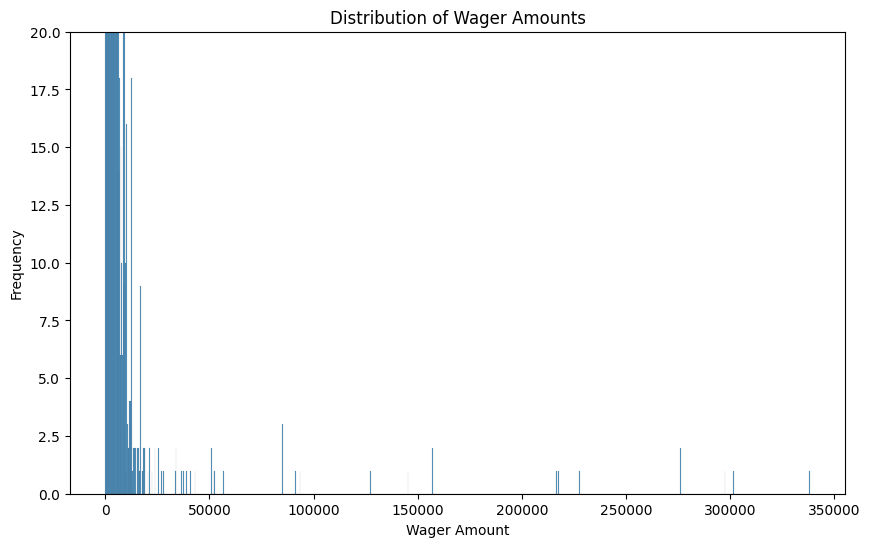

In [25]:
# Distribution of wager amounts
plt.figure(figsize=(10, 6))
sns.histplot(full_data['wager_amount'], bins=1000)
plt.title('Distribution of Wager Amounts')
plt.xlabel('Wager Amount')
plt.ylabel('Frequency')
plt.ylim(0,20)
plt.show()

It can be seen that the vast majority of wagers are low in value with sparse outliers up to a maximum of `$338,300`. Intuitively, this makes sense as they are lower risk. Next, let's narrow in on where most of the data lies.

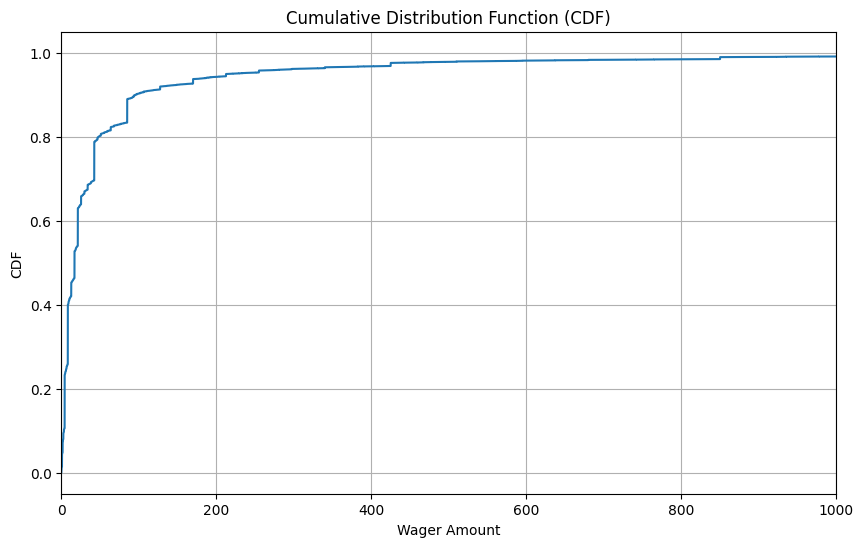

95% of the data falls within the $0 - $221.00 range.


In [26]:
# Calculate CDF of Wager Data
data_sorted = np.sort(full_data['wager_amount'])
cdf = np.arange(len(data_sorted)) / float(len(data_sorted))

# Plot CDF to see where the data lies
plt.figure(figsize=(10, 6))
plt.plot(data_sorted, cdf)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Wager Amount')
plt.ylabel('CDF')
plt.grid(True)
plt.xlim(0,1000)
plt.show()

# Find the point where the CDF reaches 95%
threshold = data_sorted[int(0.95 * len(data_sorted))]
print(f"95% of the data falls within the $0 - ${threshold:.2f} range.")

Let's plot this data to see if we have narrowed down a reasonable scope for this exploration.

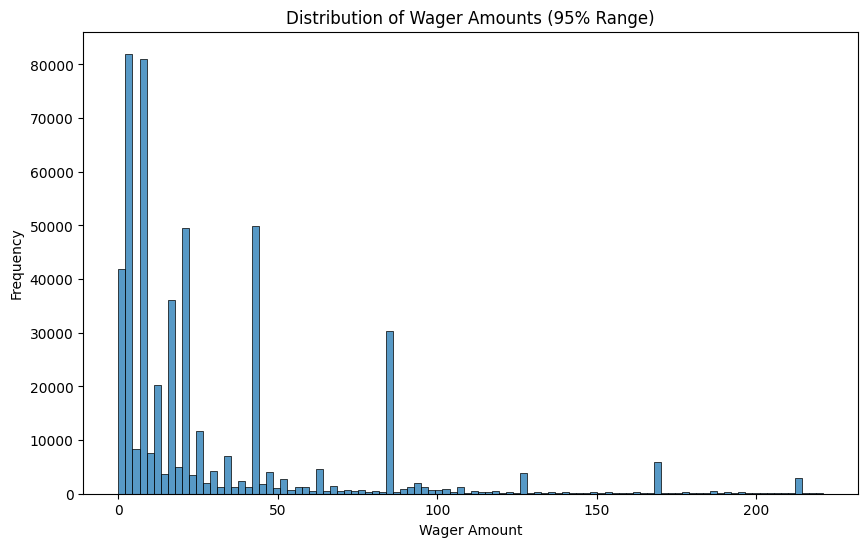

In [27]:
threshold_95 = data_sorted[int(0.95 * len(data_sorted))]
# Histogram for 95% range
plt.figure(figsize=(10, 6))
sns.histplot(full_data[full_data['wager_amount'] <= threshold_95]['wager_amount'], bins=100)
plt.title('Distribution of Wager Amounts (95% Range)')
plt.xlabel('Wager Amount')
plt.ylabel('Frequency')
plt.show()

Although 95% of all wagers fall within the `$0 - $219.30` range, focusing on bets from `$0 - $100` will provide deeper insights into the behavior of the average user. With additional time, outliers can be explored and incorporated into a more robust model.

In [28]:
# Calculating the percentage of all wagers that are in the $0-$100 range to validate its weight
total_wagers = len(full_data)

wagers_0_100 = full_data[full_data['wager_amount'] <= 100]
wagers_0_100_count = len(wagers_0_100)

percentage_0_100 = (wagers_0_100_count / total_wagers) * 100

print(f"Percentage: {percentage_0_100:.2f}%")

Percentage: 90.28%


It can be seen that >90% of the data is represented by wagers in the range `$0 - $100`. This will be our scoped down data set for model building given the time constraints.

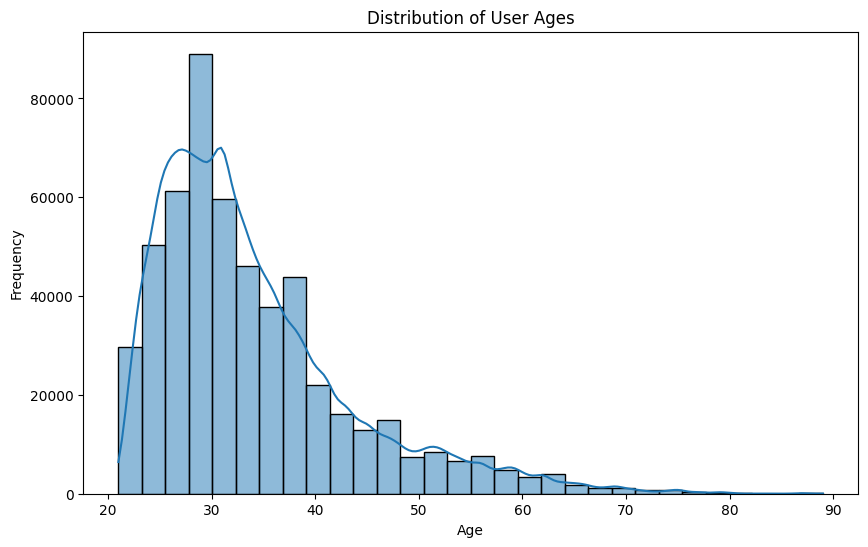

In [29]:
# Age distribution of users
plt.figure(figsize=(10, 6))
sns.histplot(full_data['age'], bins=30, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The majority of users fall within the age range of 20 to 40 years, with the peak around the late 20s to early 30s. This suggests that younger adults are the primary users of the sports betting platform.

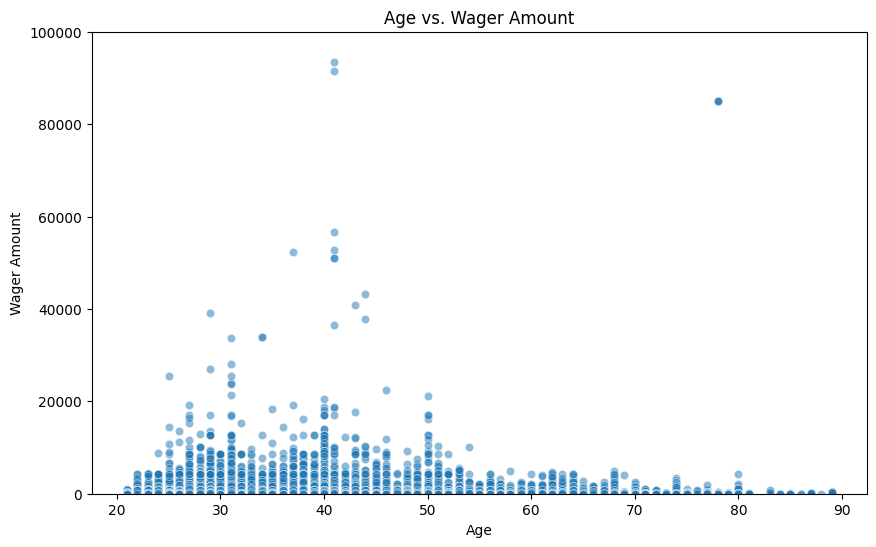

In [30]:
# Age vs. Wager Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='wager_amount', data=full_data, alpha=0.5)
plt.title('Age vs. Wager Amount')
plt.xlabel('Age')
plt.ylabel('Wager Amount')
plt.ylim(0, 100000)
plt.show()

Users under age 50 tend to take more risks in their bets.

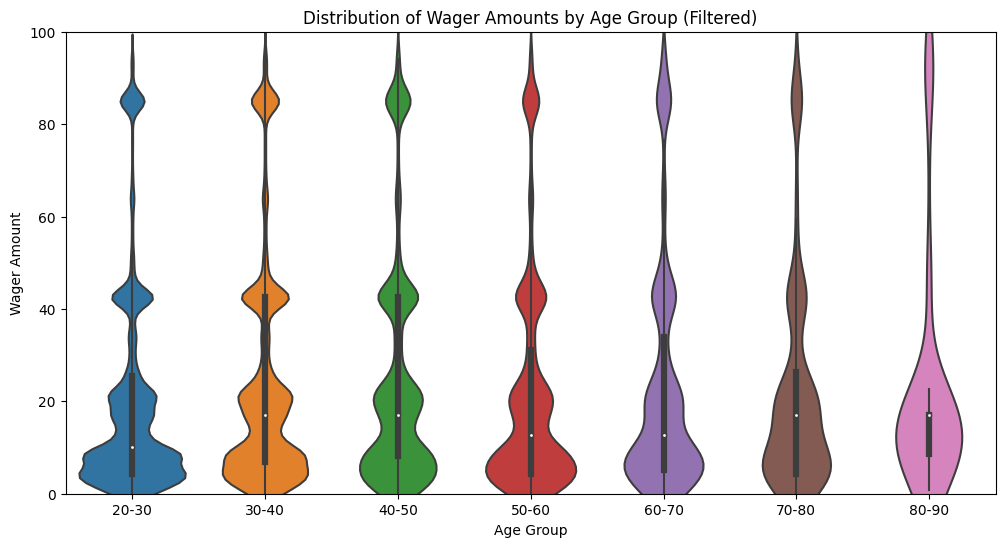

In [31]:
# Remove Outliers
Q1 = full_data['wager_amount'].quantile(0.25)
Q3 = full_data['wager_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = full_data[(full_data['wager_amount'] >= lower_bound) & (full_data['wager_amount'] <= upper_bound)].copy()

filtered_data['age_group'] = pd.cut(filtered_data['age'], bins=range(20, 91, 10),
                                    labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

plt.figure(figsize=(12, 6))
sns.violinplot(x='age_group', y='wager_amount', data=filtered_data)
plt.title('Distribution of Wager Amounts by Age Group (Filtered)')
plt.xlabel('Age Group')
plt.ylabel('Wager Amount')
plt.ylim(0, 100)
plt.show()

The median wager amount varies across different age groups suggesting that age could be a significant predictor of wagering behavior.

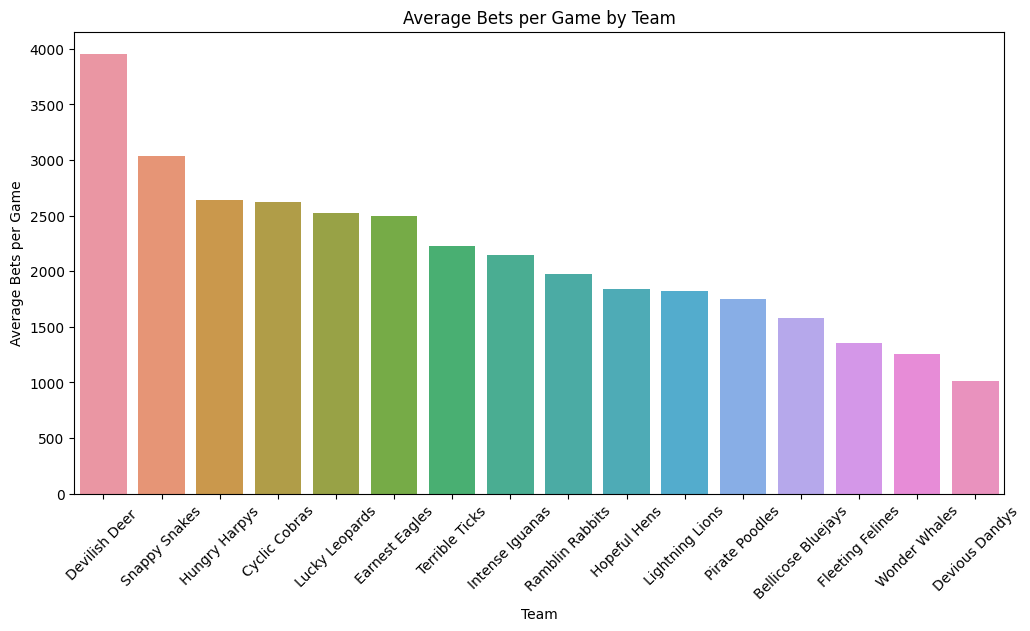

In [32]:
# Average bets by team / game

# Number of games each team played
home_games = events['home_team'].value_counts()
away_games = events['away_team'].value_counts()
total_games = home_games.add(away_games, fill_value=0)

# Number of bets for each team
home_bets = full_data['home_team'].value_counts()
away_bets = full_data['away_team'].value_counts()
total_bets = home_bets.add(away_bets, fill_value=0)

# Average bets per game for each team
average_bets_per_game = (total_bets / total_games).sort_values(ascending=False)

# Plot the average bets per game
plt.figure(figsize=(12, 6))
sns.barplot(x=average_bets_per_game.index, y=average_bets_per_game.values)
plt.title('Average Bets per Game by Team')
plt.xlabel('Team')
plt.ylabel('Average Bets per Game')
plt.xticks(rotation=45)
plt.show()

It is valuable to see which teams are playing and their average bets per game when predicting total amount of bets in a week.

# Part 2: Feature Engineering and Model Building

TARGET : `Total Wagered (handle) for a given week` \
FEATURES : `num_bets`, `num_events`, `num_users`, `avg_user_age`, `num_new_users`, `bet_frequency`, `avg_bets_per_game`, `wager_per_user`

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 0.12724935456745218
Root Mean Squared Error: 0.3567202749598797
Baseline Mean Squared Error: 17.32910060689281
Baseline Root Mean Squared Error: 4.162823633892362


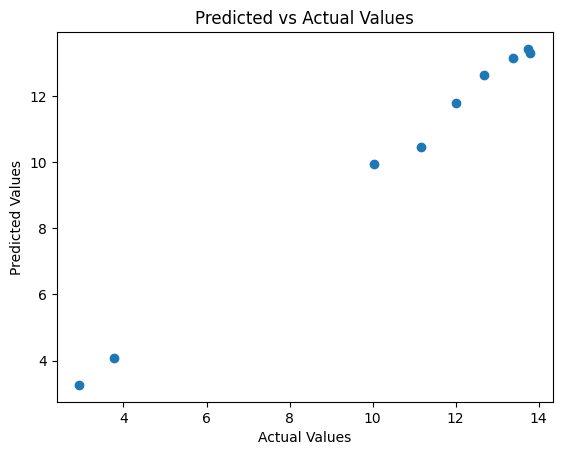

,Week,Predicted Total Wagers,Actual Total Wagers
25,25,514508.166411,647210.8
13,13,678702.942339,936422.0
8,8,35305.199706,70541.8
26,26,598370.187913,983242.2
4,4,20660.810952,22540.3
39,39,25.128957,17.9
19,19,308729.575950,325258.9
29,29,132499.683666,165100.1
30,30,58.646840,42.5


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

wagers_final = wagers_0_100.copy()

# Feature Engineering
# Calculate average bets per game
home_bets = wagers_final['home_team'].value_counts()
away_bets = wagers_final['away_team'].value_counts()
total_bets = home_bets.add(away_bets, fill_value=0)

home_games = wagers_final['home_team'].value_counts()
away_games = wagers_final['away_team'].value_counts()
total_games = home_games.add(away_games, fill_value=0)

average_bets_per_game = total_bets / total_games
average_bets_per_game.name = 'average_bets_per_game'

# Merging `average_bets_per_game` with `wagers_final`
wagers_final = wagers_final.merge(average_bets_per_game, left_on='home_team', right_index=True, how='left')

# Aggregate the data by week
wagers_final['bet_placed_time'] = pd.to_datetime(wagers_final['bet_placed_time'])
wagers_final['week'] = wagers_final['bet_placed_time'].dt.isocalendar().week

weekly_data = wagers_final.groupby('week').agg(
    total_wagers=('wager_amount', 'sum'),
    num_bets=('bet_id', 'count'),
    num_events=('event_id', 'nunique'),
    num_users=('user_number', 'nunique'),
    avg_user_age=('age', 'mean'),
    num_new_users=('user_number', lambda x: x.value_counts().loc[x.value_counts() == 1].count()),
    bet_frequency=('user_number', lambda x: x.value_counts().mean()),
    avg_bets_per_game=('average_bets_per_game', 'mean')
).reset_index()

# Calculate wager per user
weekly_data['wager_per_user'] = weekly_data['total_wagers'] / weekly_data['num_users']

# Log transformation of the target variable
weekly_data['log_total_wagers'] = np.log1p(weekly_data['total_wagers'])

# Define features and target
features = weekly_data[['num_bets', 'num_events', 'num_users', 'avg_user_age', 'num_new_users', 'bet_frequency', 'avg_bets_per_game', 'wager_per_user']]
target = weekly_data['log_total_wagers']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict and evaluate
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Compare with baseline model
mean_wagers = y_train.mean()
baseline_predictions = np.full_like(y_test, mean_wagers)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_rmse = np.sqrt(baseline_mse)

print(f'Baseline Mean Squared Error: {baseline_mse}')
print(f'Baseline Root Mean Squared Error: {baseline_rmse}')

# Plotting predictions vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Inverse log transformation for predictions and actual values
predicted_total_wagers = np.expm1(predictions)
actual_total_wagers = np.expm1(y_test)

# DataFrame for comparison
comparison_df = pd.DataFrame({
    'Week': X_test.index,
    'Predicted Total Wagers': predicted_total_wagers,
    'Actual Total Wagers': actual_total_wagers
})

display(comparison_df)

# Part 3: Write up

## Objective

The objective of this analysis is to build a model to predict the handle on the matches in week 12 of the 2020 season.

## Data Preparation and Exploration

- **Data Sources**: The dataset consists of wagers placed on matches along with various attributes such as wager amount, team names, user details, and bet times.
- **Data Cleaning**: Ensured no null values and checked data types for consistency.
- **Data Filtering**: Focused on wagers with amounts between 0 and 100 dollars to reduce the impact of outliers and focus on typical betting behavior. This decision was based on the analysis showing that 90+% of wagers fall within this range, covering the majority of user behavior. With more time, it would be vital to include all data, including outliers, to capture the full spectrum of betting behavior. The inclusion of larger wagers in a production model is essential due to their potential significant business and financial impact. High-value bets, though less frequent, can substantially influence the total handle and affect revenue projections and risk management strategies for theScore.

## Exploratory Data Analysis

- **CDF Plot**: The Cumulative Distribution Function (CDF) showed that 95% of the data falls within the 0 - 219 dollar range, serving as the first iteration of narrowing our scope.
- **Histogram of Wager Amounts**: Provided insights into the distribution of wager amounts within the 95% range that lead to scoping down to 90% of data including records from wager value 0-100 dollars.
- **Age Distribution**: Most users fall within the age range of 20 to 40 years.
- **Age vs. Wager Size**: Highlighted that users under age 50 tend to take more risks and the importance of age as a feature. The violin plot also displayed varying medians and distributions of how different age groups wager.
- **Average Bets by Team**: Visualized average bets per game by team, showing significant variability among teams. Knowing which teams are playing in a given week and how people bet on them is crucial for predicting a given week's handle.

## Feature Engineering

**Features Created**:
- Number of bets per week (num_bets)
- Number of events per week (num_events)
- Number of users per week (num_users)
- Average user age per week (avg_user_age)
- Number of new users per week (num_new_users)
- Bet frequency per user (bet_frequency)
- Average bets per game (avg_bets_per_game)
- Wager per user (wager_per_user)

## Model Building

- **Model Chosen**: RandomForestRegressor with hyperparameter tuning using GridSearchCV. The RandomForestRegressor was chosen for this problem due to its ability to capture complex interactions between features, its robustness against overfitting, and its versatility in handling both numerical and categorical data. This makes it suitable for predicting weekly total wager amounts where user behavior and game events interact in multifaceted ways.
- **Train-Test Split**: Data was split into training (80%) and testing (20%) sets to evaluate model performance.
- **Hyperparameter Tuning**:
  - Parameters tuned: n_estimators, max_depth, min_samples_split, min_samples_leaf, bootstrap
- **Performance Metrics**:
  - Mean Squared Error (MSE): 0.12724935465745218
  - Root Mean Squared Error (RMSE): 0.3562702749598797
  - Baseline MSE: 17.32910066089281
  - Baseline RMSE: 4.162823633892362
- **Validation/Future Work**: To further validate and iterate on the model, I would employ multiple strategies. Implementing k-fold cross-validation would ensure consistent performance across different data subsets, enhancing robustness. Analyzing feature importance could hekp with refinement efforts by highlighting impactful features. Residual analysis would help identify patterns in prediction errors, allowing for  targeted improvements. Additionally, continuous hyperparameter tuning could enhance accuracy. Validating the model on future data would ensure relevance and accuracy over time. These steps would collectively enhance the model's predictive capabilities and reliability.

## Results

- **Predicted vs. Actual Values**: The model shows a good alignment with actual values, indicating its effectiveness in predicting the total wager amount for a given week.
- **Prediction Example**: For week 19, the predicted total wagers were 308,729.6, while the actual total wagers were 325,258.9.

## Challenges and Limitations

**Challenges**:
- Time Constraints: The limited timeframe of the project made it challenging to further explore different features and alternative models. This constraint also limited the ability to perform extensive hyperparameter tuning and cross-validation to improve the performance of the model.
- Data Quality: Ensuring no null values and consistency in data types.

**Limitations**:
- Feature Engineering: While key features were created, there are still opportunities to enhance the model. Additional features for future work are mentioned below.
- Model Generalization: The model is focused on wagers between 0 and 100 dollars, which might exclude significant behavior from higher wager amounts. This focus might limit the model’s ability to generalize to all betting behaviors, potentially missing out on critical insights from high-stake bets.
- Data Scope: The model did not account for geographical variations in betting behavior due to the staggered availability of wagering across provinces. Including this aspect could improve the model’s accuracy and relevance.
- Simplification of Wagers: The model currently assumes all wagers are straight single-leg wagers, which simplifies the betting scenarios but may not capture the complexity of actual betting behavior.

## Conclusion and Future Work

**Summary**: The model effectively predicts the total wager amount with reasonable accuracy, leveraging key features from the data.

**Future Work**:
- Feature Enhancement:
    - New Player Excitement: Incorporating a feature that captures the introduction of wagering in new provinces could help model the surge in betting activity.
    - Game Time Clusters: Adding a feature to account for the competition among games during the same time slots could improve the model’s accuracy.
    - Team Popularity Metrics: Metrics to gauge the popularity of teams, such as social media mentions, fan following, or past performance, could provide additional insights into betting patterns.
    - Geographical Variations: Including features that account for geographical variations in betting behavior due to the staggered availability of wagering across provinces could enhance the model.
- Model Complexity: Explore advanced models like XGBoost and deep learning techniques, which might provide better performance due to their ability to model non-linear relationships and complex interactions within the data.
- Data Scope: Expand the scope to include higher wager amounts and multi-leg bets to generalize the model better. This expansion would help capture a broader spectrum of betting behaviors and provide more comprehensive insights.
- User Segmentation: Analyze and model different segments of users based on their betting behavior, which could lead to more personalized and accurate predictions for different user groups.